### Data prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.android', '.atom', '.bash_history', '.cache', '.conda', '.config', '.dataloader', '.dbshell', '.eclipse', '.emulator_console_auth_token', '.gitconfig', '.gradle', '.idea', '.ipynb_checkpoints', '.ipython', '.jdks', '.jupyter', '.lemminx', '.lesshst', '.m2', '.matplotlib', '.mongorc.js', '.ms-ad', '.nbi', '.openjfx', '.p2', '.spyder-py3', '.ssh', '.sts4', '.viminfo', '.VirtualBox', '.vscode', '3D Objects', 'android', 'AndroidStudioProjects', 'AppData', 'Application Data', 'ass.py', 'Assignment0.ipynb', 'Assignment4.ipynb', 'Assignment6.ipynb', 'BB_stats_2000.csv', 'Classification_heart (1).ipynb', 'Clustering.ipynb', 'Cookies', 'dataloader', 'Desktop', 'Documents', 'Downloads', 'ds-venv', 'dsA.csv', 'dsB.csv', 'dsC.csv', 'dsD.csv', 'dsE.csv', 'dsF.csv', 'dsG.csv', 'dsH.csv', 'DT.ipynb', 'eclipse', 'eclipse-workspace', 'Encryption1MAY_5', 'Favorites', 'fn.py', 'Heart.csv', 'IntelGraphicsProfiles', 'Jedi', 'Linear_regression.ipynb', 'Links', 'Local Settings', 'milestone.ipynb', 'Ml_Ass

In [2]:
heart_data=pd.read_csv('Heart.csv')

In [3]:
X = heart_data.iloc[:, :-1].values
y = heart_data.iloc[:, -1].values

In [4]:
from sklearn import preprocessing
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
X_preprocessed = min_max_scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_preprocessed,y,test_size=0.20,random_state=0)

### K means clustering using elbow method

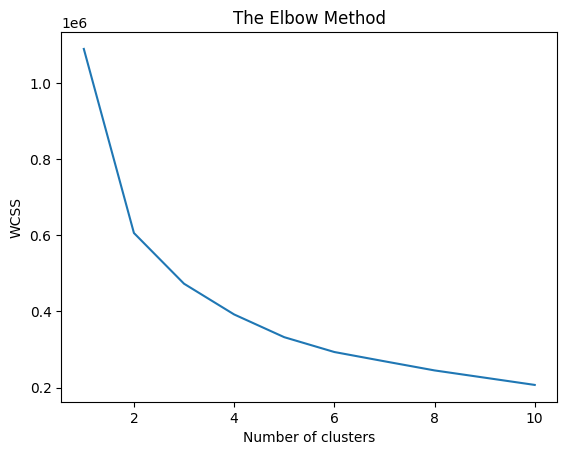

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[4 4 0 4 1 0 1 4 0 0 4 5 4 2 1 4 1 2 4 4 4 4 4 5 0 1 0 2 3 0 0 2 0 5 2 0 1
 4 5 1 1 4 0 5 1 1 4 4 2 4 4 1 4 0 4 0 4 4 0 1 5 1 0 2 0 0 2 4 4 0 4 4 0 4
 0 4 4 4 0 4 4 1 1 1 5 3 5 0 0 5 4 0 4 1 2 2 3 4 1 4 4 5 0 4 0 2 5 4 4 4 1
 0 1 0 4 0 0 0 0 4 1 4 4 4 0 0 2 1 0 5 0 4 1 4 1 4 2 2 2 5 1 1 0 2 2 5 4 4
 4 0 4 2 4 5 4 2 4 0 2 4 4 1 0 0 0 5 2 4 4 0 5 4 1 4 2 2 4 1 2 5 1 2 1 4 5
 1 4 5 4 0 1 2 2 5 0 1 4 4 5 4 0 5 5 5 0 4 4 4 2 0 4 5 2 1 4 1 5 1 5 4 3 2
 1 5 5 2 5 2 1 1 4 5 1 5 1 1 1 1 1 1 5 5 2 5 2 4 3 5 1 5 1 4 5 1 5 1 5 2 4
 4 4 4 5 4 2 2 1 2 5 5 4 4 5 4 5 0 2 5 1 2 1 0 2 4 2 1 0 4 1 2 0 1 4 2 0 2
 2 2 5 5 2 2 4 4]


In [32]:
print("The centroids are ", kmeans.cluster_centers_)

print("Assignments are: ")
print(kmeans.labels_)

The centroids are  [[4.80754717e+01 6.79245283e-01 1.30188679e+00 1.28886792e+02
  1.93660377e+02 1.69811321e-01 6.79245283e-01 1.67283019e+02
  1.50943396e-01 7.52830189e-01 1.58490566e+00 4.52830189e-01
  2.15094340e+00]
 [5.55964912e+01 5.78947368e-01 8.42105263e-01 1.35263158e+02
  3.10070175e+02 1.40350877e-01 5.26315789e-01 1.53298246e+02
  3.68421053e-01 9.96491228e-01 1.52631579e+00 7.71929825e-01
  2.33333333e+00]
 [5.73265306e+01 7.55102041e-01 6.73469388e-01 1.27530612e+02
  1.97836735e+02 1.02040816e-01 5.71428571e-01 1.26489796e+02
  4.69387755e-01 1.43265306e+00 1.20408163e+00 8.36734694e-01
  2.30612245e+00]
 [6.26000000e+01 0.00000000e+00 8.00000000e-01 1.35800000e+02
  4.38200000e+02 2.00000000e-01 0.00000000e+00 1.55600000e+02
  2.00000000e-01 1.90000000e+00 1.20000000e+00 1.20000000e+00
  2.60000000e+00]
 [5.23186813e+01 7.14285714e-01 1.08791209e+00 1.29802198e+02
  2.42285714e+02 1.42857143e-01 5.27472527e-01 1.63076923e+02
  2.19780220e-01 7.86813187e-01 1.4945054

### Dimensional Analysis

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[23  6]
 [ 2 30]]


0.8688524590163934

### 3. Visualize and create a narrative about what you have discovered in the data. Don't just be descriptive, think predictively
#### As the data is supervised, PCA is not possible. As the data which I considered has only 2 classes for prediction, LDA is not supportable due to the below statement. n_components cannot be larger than min(n_features, n_classes - 1. So, dimensional analysis is not possible. The data can be viewd from clusters. To perform dimensional analysis, we need two axis, x-axis and y-axis. Here, number of classes are two, n_components min(features, n_classes-1) i.e. 2-1=1. min(features, 1), minimum is 1. So, we are getting only one axis, we cannot perform dimensional analysis with one axis.
#### As the data do not contain any anomolous data and the data is supervised, we can predict it with any supervised models like random forest, neural nets and regression to get best accuracy. For the dataset, we got 6 clusters as shown above. 

### Anomolous data
#### There is no anomolous data for this dataset. Anomaly detection is identifying data points in data that don't fit the normal patterns. We usually perform anomaly detection to make it more effective, especially when large datasets are involved. As explained above. The dataset do not have anomolous data.


#### Random Forrest

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [14]:
y_pred1 = classifier1.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred1)
print(cm)
accuracy_score(Y_test, y_pred1)

[[22  7]
 [ 9 23]]


0.7377049180327869

In [26]:
pip install tensorflow


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, Y_train, batch_size = 32, epochs = 200)

Epoch 1/200
8/8 [==============================] - 2s 3ms/step - loss: 0.7347 - accuracy: 0.5432
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 0.7257 - accuracy: 0.5432
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 0.7173 - accuracy: 0.5473
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7088 - accuracy: 0.5514
Epoch 5/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.5514
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5514
Epoch 7/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5514
Epoch 8/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.5473
Epoch 9/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.5473
Epoch 10/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.5514
Epoch 11/200
8/8 [===========

In [29]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 5ms/step


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[23  6]
 [ 3 29]]


0.8524590163934426